In [99]:
from eval_script import * 

In [100]:
jpg = 'Hasetur_52546010.jpg'

In [101]:
best_df = pd.read_csv('./03-04-24/data/test_inference.csv')
baseline_df = pd.read_csv('./03-03-24-01/data/test_inference.csv')

In [102]:
best_df.head()

,id,phonetic_id,author,llava_findings,llava_impression,llava_report,radiologist_report,radiologist_findings,radiologist_impression,similarity,impression_similarity,findings_similarity,is_si_l,is_si_r,lf_len,li_len,rf_len,ri_len,llava_rep_summary,radiologist_rep_summary
0,54059849,Abifel,"Jacobs, Kathleen",FINDINGS:\nLungs are well expanded. Bronchial ...,IMPRESSION: No acute findings.,FINDINGS:\nLungs are well expanded. Bronchial ...,FINDINGS:\nLungs are well expanded and clear. ...,FINDINGS:\nLungs are well expanded and clear. ...,IMPRESSION: No acute findings.,0.911282,0.924824,0.906267,False,False,220,30,184,30,FDG PET/CT demonstrates well-expanded bilatera...,FDG PET/CT demonstrates no evidence of FDG avi...
1,53428634,Aburik,"Hahn, Lewis",FINDINGS:\nLines and Tubes: Right upper extrem...,IMPRESSION: Right upper extremity PICC termina...,FINDINGS:\nLines and Tubes: Right upper extrem...,FINDINGS:\nLines and Tubes: Right upper extrem...,FINDINGS:\nLines and Tubes: Right upper extrem...,IMPRESSION: Right upper extremity PICC termina...,0.726511,0.378502,0.856207,False,False,255,171,328,86,[1] Unchanged right upper extremity PICC termi...,[1] Unchanged right upper extremity PICC termi...
2,53439132,Achoroos,"Smitaman, Edward",FINDINGS:\nPlease see Impression.\n\n\n,"IMPRESSION: Clear lungs. No pneumothorax, pleu...",FINDINGS:\nPlease see Impression.\n\n\nIMPRESS...,FINDINGS:\nLines and Tubes: None Mediastinum:...,FINDINGS:\nLines and Tubes: None Mediastinum:...,IMPRESSION: No acute pulmonary findings.,0.579788,0.608229,0.174392,True,False,35,119,325,40,No evidence of sarcoidosis or other acute abno...,[1] No acute pulmonary findings. [2] Improved ...
3,50219723,Ackoofdek,"Wyatt, Alvin",FINDINGS:\nSee impression.\n\n\n,IMPRESSION: No acute cardiopulmonary abnormali...,FINDINGS:\nSee impression.\n\n\nIMPRESSION: No...,FINDINGS:\nSee impression\n\nIMPRESSION: Exam ...,FINDINGS:\nSee impression\n\n,IMPRESSION: Exam is somewhat limited by patien...,0.379651,0.294585,0.872348,True,True,28,83,26,325,No acute abnormality seen.,[1] No evidence of FDG avid malignancy. [2] Se...
4,52165792,Adefoup,"Weihe, Elizabeth",FINDINGS:/: \nThe cardiac silhouette is enla...,NaN,FINDINGS:/: \nThe cardiac silhouette is enla...,FINDINGS:/: \nNo evidence for focal pneumoni...,FINDINGS:/: \nNo evidence for focal pneumoni...,NaN,0.566880,1.000000,0.566880,False,False,284,0,332,0,[1] Enlarged cardiac silhouette. [2] Superimpo...,FDG PET/CT demonstrates no evidence of focal p...


In [103]:
baseline_df.head()

,id,phonetic_id,author,llava_findings,llava_impression,llava_report,radiologist_report,radiologist_findings,radiologist_impression,similarity,impression_similarity,findings_similarity,is_si_l,is_si_r,lf_len,li_len,rf_len,ri_len,llava_rep_summary,radiologist_rep_summary
0,54059849,Abifel,"Jacobs, Kathleen",FINDINGS:\nLines and Tubes: None\nMediastinum:...,IMPRESSION: No acute cardiopulmonary findings.,FINDINGS:\nLines and Tubes: None\nMediastinum:...,FINDINGS:\nLungs are well expanded and clear. ...,FINDINGS:\nLungs are well expanded and clear. ...,IMPRESSION: No acute findings.,0.527769,0.639181,0.489103,False,False,226,46,184,30,No FDG PET/CT findings of acute cardiopulmonar...,FDG PET/CT demonstrates no evidence of FDG avi...
1,53428634,Aburik,"Hahn, Lewis",FINDINGS:\nLines and Tubes: None Mediastinum:...,IMPRESSION: No acute cardiopulmonary abnormality.,FINDINGS:\nLines and Tubes: None Mediastinum:...,FINDINGS:\nLines and Tubes: Right upper extrem...,FINDINGS:\nLines and Tubes: Right upper extrem...,IMPRESSION: Right upper extremity PICC termina...,0.517924,0.025647,0.644157,False,False,233,49,328,86,Unchanged cardiomegaly and mediastinal blood p...,[1] Unchanged right upper extremity PICC termi...
2,53439132,Achoroos,"Smitaman, Edward",FINDINGS:\nLines and Tubes: None Mediastinum:...,IMPRESSION: New small right pleural effusion. ...,FINDINGS:\nLines and Tubes: None Mediastinum:...,FINDINGS:\nLines and Tubes: None Mediastinum:...,FINDINGS:\nLines and Tubes: None Mediastinum:...,IMPRESSION: No acute pulmonary findings.,0.678396,0.302727,0.744527,False,False,256,120,325,40,[1] New small right pleural effusion. [2] Incr...,[1] No acute pulmonary findings. [2] Improved ...
3,50219723,Ackoofdek,"Wyatt, Alvin",FINDINGS:\nLines and Tubes: None Mediastinum:...,IMPRESSION: Increased right basilar opacity co...,FINDINGS:\nLines and Tubes: None Mediastinum:...,FINDINGS:\nSee impression\n\nIMPRESSION: Exam ...,FINDINGS:\nSee impression\n\n,IMPRESSION: Exam is somewhat limited by patien...,0.454854,0.383412,0.294742,False,True,238,86,26,325,[1] Increased right basilar opacity with addit...,[1] No evidence of FDG avid malignancy. [2] Se...
4,52165792,Adefoup,"Weihe, Elizabeth",FINDINGS:\nLines and Tubes: None Mediastinum:...,IMPRESSION: No acute cardiopulmonary abnormality.,FINDINGS:\nLines and Tubes: None Mediastinum:...,FINDINGS:/: \nNo evidence for focal pneumoni...,FINDINGS:/: \nNo evidence for focal pneumoni...,NaN,0.463832,-0.038224,0.454711,False,False,233,49,332,0,Unchanged cardiomegaly and mediastinal blood p...,FDG PET/CT demonstrates no evidence of focal p...


In [104]:
# baseline_df = baseline_df[baseline_df['author'].str.contains('Hsiao')]

In [105]:
# best_df = best_df[best_df['author'].str.contains('Hsiao')]

In [106]:
baseline_df.set_index('id', inplace=True)
best_df.set_index('id', inplace=True)

In [107]:
baseline_df = baseline_df[['phonetic_id', 'author',
       'llava_report', 'radiologist_report', 'similarity', 'impression_similarity',
       'findings_similarity', 'radiologist_rep_summary', 'llava_rep_summary']]

best_df = best_df[['phonetic_id', 'author',
       'llava_report', 'radiologist_report', 'similarity', 'impression_similarity',
       'findings_similarity', 'radiologist_rep_summary', 'llava_rep_summary']]

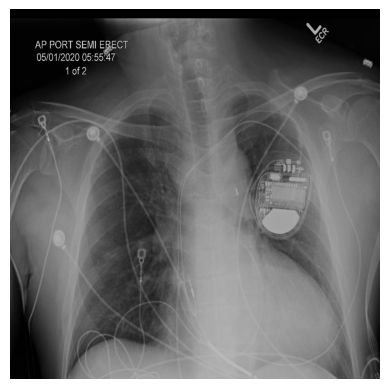

Row Data Overview:
ID:                      52551517
--------------------------------------------------
phonetic_id:             Dabida
author:                  Hsiao, Albert
llava_report:            FINDINGS: See impression. IMPRESSION: Stable
appearance of the chest and supportive devices.
Stable interstitial edema.
radiologist_report:      FINDINGS: See impression. IMPRESSION: Stable
appearance of the chest and supportive devices.
Cardiomegaly. Intra-aortic balloon pump and
Swan-Ganz catheter are again noted, unchanged in
configuration. No overt evidence of pulmonary
edema.
similarity:              0.7336913
impression_similarity:   0.7524154
findings_similarity:     0.8430037
radiologist_rep_summary: [1] Stable appearance of the chest and supportive
devices again noted. Cardiomegaly. [2] No new ct
findings.
llava_rep_summary:       [1] Stable appearance of the chest and supportive
devices. [2] Stable interstitial edema.
--------------------------------------------------


In [108]:
print_row_nicely(sample_by_bin(best_df, 'similarity', 8))

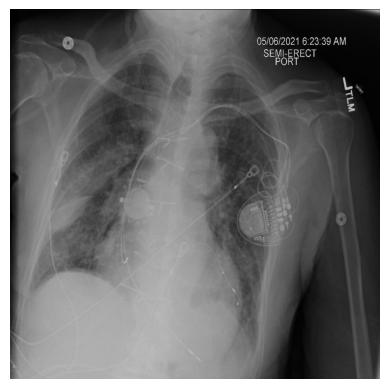

Row Data Overview:
ID:                      53628087
--------------------------------------------------
phonetic_id:             Hofupo
author:                  Hsiao, Albert
llava_report:            FINDINGS: Lines and Tubes: None Mediastinum: The
cardiomediastinal silhouette is unchanged. No
lymphadenopathy is appreciated. Lungs: The lungs
are clear. Pleura: No pneumothorax or effusion.
Bones and soft tissues: Unchanged IMPRESSION: No
acute cardiopulmonary abnormality.
radiologist_report:      FINDINGS: See impression. IMPRESSION: Interval
removal of a right IJ Swan-Ganz catheter. Sheath
remains present. Increased interstitial and
alveolar pulmonary edema. Stable small bilateral
pleural effusions with slight loculation in the
right major fissure.
similarity:              0.36297828
impression_similarity:   0.11320034
findings_similarity:     0.16030306
radiologist_rep_summary: Interval removal of a right IJ Swan-Ganz catheter
with increased interstitial and alveolar pulmonary
edema. 

In [116]:
baseline_row = baseline_df.loc[53628087]

print_row_nicely(baseline_row)

In [110]:
answers = pd.read_csv('../raymond/030424_test_patient_finding_impression_answers.csv')

In [111]:
print(answers[answers['AccessionId'] == 53989429]['prompt'].iloc[0])

AUTHOR: Hsiao, Albert 
CLINICAL HISTORY: Cough for 1 month
CONTEXT: Outpatient
AGE: 73
SEX: Female


In [112]:
answers_baseline = pd.read_csv('../raymond/030324_test_patient_finding_impression_answers01.csv')

In [113]:
print(answers_baseline[answers_baseline['AccessionId'] == 53989429]['prompt'].iloc[0])

AUTHOR: Hsiao, Albert 
CLINICAL HISTORY: Cough for 1 month
CONTEXT: Outpatient
AGE: 73
SEX: Female


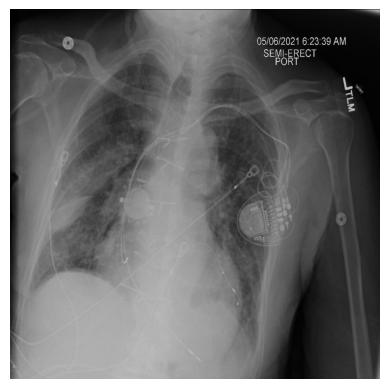

Row Data Overview:
ID:                      53628087
--------------------------------------------------
phonetic_id:             Hofupo
author:                  Hsiao, Albert
llava_report:            FINDINGS: See impression. IMPRESSION: Interval
removal of a right IJ sheath. Right chest tubes
remain present. Stable small right pneumothorax.
Stable interstitial edema.
radiologist_report:      FINDINGS: See impression. IMPRESSION: Interval
removal of a right IJ Swan-Ganz catheter. Sheath
remains present. Increased interstitial and
alveolar pulmonary edema. Stable small bilateral
pleural effusions with slight loculation in the
right major fissure.
similarity:              0.754923
impression_similarity:   0.73949134
findings_similarity:     0.8430037
radiologist_rep_summary: Interval removal of a right IJ Swan-Ganz catheter
with increased interstitial and alveolar pulmonary
edema. Stable small bilateral pleural effusions.
llava_rep_summary:       [1] Interval removal of a right IJ sheath

In [117]:
print_row_nicely(best_df.loc[53628087])

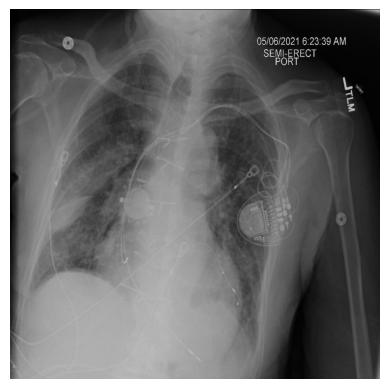

Row Data Overview:
ID:                      53628087
--------------------------------------------------
phonetic_id:             Hofupo
author:                  Hsiao, Albert
llava_report:            FINDINGS: Lines and Tubes: None Mediastinum: The
cardiomediastinal silhouette is unchanged. No
lymphadenopathy is appreciated. Lungs: The lungs
are clear. Pleura: No pneumothorax or effusion.
Bones and soft tissues: Unchanged IMPRESSION: No
acute cardiopulmonary abnormality.
radiologist_report:      FINDINGS: See impression. IMPRESSION: Interval
removal of a right IJ Swan-Ganz catheter. Sheath
remains present. Increased interstitial and
alveolar pulmonary edema. Stable small bilateral
pleural effusions with slight loculation in the
right major fissure.
similarity:              0.36297828
impression_similarity:   0.11320034
findings_similarity:     0.16030306
radiologist_rep_summary: Interval removal of a right IJ Swan-Ganz catheter
with increased interstitial and alveolar pulmonary
edema. 

In [119]:
print_row_nicely(baseline_df.loc[53628087])